You are given a positive integer n representing the number of nodes of a Directed Acyclic Graph (DAG). The nodes are numbered from 0 to n - 1 (inclusive).

You are also given a 2D integer array edges, where edges[i] = [fromi, toi] denotes that there is a unidirectional edge from fromi to toi in the graph.

Return a list answer, where answer[i] is the list of ancestors of the ith node, sorted in ascending order.

A node u is an ancestor of another node v if u can reach v via a set of edges.

 

Example 1:

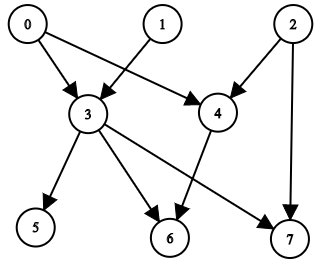

Input: n = 8, edgeList = [[0,3],[0,4],[1,3],[2,4],[2,7],[3,5],[3,6],[3,7],[4,6]]
Output: [[],[],[],[0,1],[0,2],[0,1,3],[0,1,2,3,4],[0,1,2,3]]
Explanation:
The above diagram represents the input graph.
- Nodes 0, 1, and 2 do not have any ancestors.
- Node 3 has two ancestors 0 and 1.
- Node 4 has two ancestors 0 and 2.
- Node 5 has three ancestors 0, 1, and 3.
- Node 6 has five ancestors 0, 1, 2, 3, and 4.
- Node 7 has four ancestors 0, 1, 2, and 3.

Example 2:

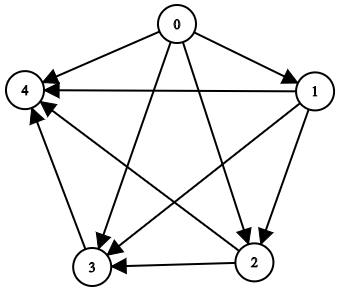

Input: n = 5, edgeList = [[0,1],[0,2],[0,3],[0,4],[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]]
Output: [[],[0],[0,1],[0,1,2],[0,1,2,3]]
Explanation:
The above diagram represents the input graph.
- Node 0 does not have any ancestor.
- Node 1 has one ancestor 0.
- Node 2 has two ancestors 0 and 1.
- Node 3 has three ancestors 0, 1, and 2.
- Node 4 has four ancestors 0, 1, 2, and 3.

 

Constraints:

    1 <= n <= 1000
    0 <= edges.length <= min(2000, n * (n - 1) / 2)
    edges[i].length == 2
    0 <= fromi, toi <= n - 1
    fromi != toi
    There are no duplicate edges.
    The graph is directed and acyclic.



In [ ]:
class Solution:
    def getAncestors(self, n: int, edges: List[List[int]]) -> List[List[int]]:
        forward = [[] for _ in range(n)]
        indegree = [0 for _ in range(n)]
        for i, j in edges:
            forward[i].append(j)
            indegree[j] += 1
        
        ans = [set() for _ in range(n)]
        q = deque()
        for n, i in enumerate(indegree):
            if i == 0:
                q.append(n)
        
        while q:
            node = q.popleft()
            for nxt in forward[node]:
                ans[nxt].add(node)
                ans[nxt].update(ans[node])
                indegree[nxt] -= 1
                if indegree[nxt] == 0:
                    q.append(nxt)

        ans = [sorted(l) for l in ans]
        return ans
